In [1]:
cd ..

/Users/Amar/Dropbox/Computer_Science/GATECH-OMSCS/7641_ML/GT_ML_Project_1


In [2]:
%run __init__.py

In [3]:
%run src/load_data.py

In [4]:
from lib.benchmark import run_model, plot_results
from lib.benchmark import pipeline_basic
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from tqdm import tqdm

sns.set()

# Adaboost does does not care about scaling or not, so we won't bother

In [5]:
adt_data = data['adult']['train']['engineered']
adt_lbls = data['adult']['train']['labels']
mad_data = data['madelon']['train']['raw_data']
mad_lbls = data['madelon']['train']['labels']

In [6]:
cls = pipeline_basic(AdaBoostClassifier)


# Madelon

In [7]:
np.linspace(0.01,2,4)

array([ 0.01      ,  0.67333333,  1.33666667,  2.        ])

In [8]:
param_grid = {
    'n_estimators' : [1,25,50,75,100,125,150,175,200,225,250,275,300],
    'learning_rate': np.linspace(0.01,1,4)
}

gs_ada_mad = GridSearchCV(cls, param_grid, n_jobs=-1, cv=StratifiedKFold(), scoring = 'f1', verbose = 1)
gs_ada_mad.fit(mad_data, mad_lbls)

Fitting 3 folds for each of 52 candidates, totalling 156 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 156 out of 156 | elapsed:  5.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': array([ 0.01,  0.34,  0.67,  1.  ]), 'n_estimators': [1, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=1)

In [9]:
print(gs_ada_mad.best_params_)
mad_res = pd.DataFrame(gs_ada_mad.cv_results_)
print(mad_res.shape)
mad_res.columns

{'learning_rate': 0.01, 'n_estimators': 1}
(52, 18)


Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_learning_rate', 'param_n_estimators',
       'params', 'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'std_fit_time', 'std_score_time',
       'std_test_score', 'std_train_score'],
      dtype='object')

In [10]:
mad_res['param_learning_rate'].unique()

array([0.01, 0.34000000000000002, 0.67000000000000004, 1.0], dtype=object)

# Adult

In [ ]:
gs_ada_adl = GridSearchCV(cls, param_grid, n_jobs=-1, cv=StratifiedKFold(), scoring = 'f1', verbose = 1)
gs_ada_adl.fit(adt_data, adt_lbls)

In [14]:
print(gs_ada_adl.best_params_)
adl_res = pd.DataFrame(gs_ada_adl.cv_results_)
print(adl_res.shape)
adl_res.columns

{'learning_rate': 1.0, 'n_estimators': 300}
(52, 18)


Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_learning_rate', 'param_n_estimators',
       'params', 'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'std_fit_time', 'std_score_time',
       'std_test_score', 'std_train_score'],
      dtype='object')

# Plotting

Text(0.5,1,'Adult')

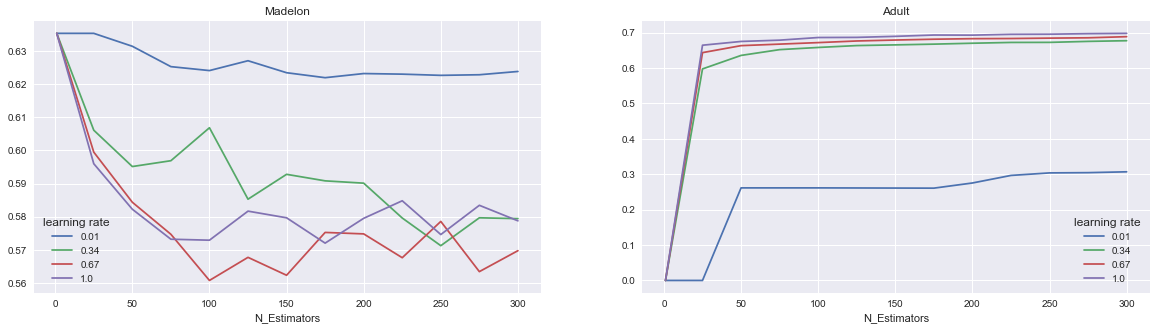

In [15]:
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,2,1)
plt.plot(mad_res[(mad_res['param_learning_rate'] == 0.01)]['param_n_estimators'],
         mad_res[(mad_res['param_learning_rate'] == 0.01)]['mean_test_score'], label = "0.01")
plt.plot(mad_res[(mad_res['param_learning_rate'] == 0.34000000000000002)]['param_n_estimators'],
         mad_res[(mad_res['param_learning_rate'] == 0.34000000000000002)]['mean_test_score'], label = "0.34")
plt.plot(mad_res[(mad_res['param_learning_rate'] == 0.67000000000000004)]['param_n_estimators'],
         mad_res[(mad_res['param_learning_rate'] == 0.67000000000000004)]['mean_test_score'], label = "0.67")
plt.plot(mad_res[(mad_res['param_learning_rate'] == 1)]['param_n_estimators'],
         mad_res[(mad_res['param_learning_rate'] == 1)]['mean_test_score'], label = "1.0")
plt.legend(title = "learning rate")
plt.xlabel("N_Estimators")
plt.title("Madelon")
fig.add_subplot(1,2,2)
plt.plot(adl_res[(adl_res['param_learning_rate'] == 0.01)]['param_n_estimators'],
         adl_res[(adl_res['param_learning_rate'] == 0.01)]['mean_test_score'], label = "0.01")
plt.plot(adl_res[(adl_res['param_learning_rate'] == 0.34000000000000002)]['param_n_estimators'],
         adl_res[(adl_res['param_learning_rate'] == 0.34000000000000002)]['mean_test_score'], label = "0.34")
plt.plot(adl_res[(adl_res['param_learning_rate'] == 0.67000000000000004)]['param_n_estimators'],
         adl_res[(adl_res['param_learning_rate'] == 0.67000000000000004)]['mean_test_score'], label = "0.67")
plt.plot(adl_res[(adl_res['param_learning_rate'] == 1)]['param_n_estimators'],
         adl_res[(adl_res['param_learning_rate'] == 1)]['mean_test_score'], label = "1.0")
plt.legend(title = "learning rate")
plt.xlabel("N_Estimators")
plt.title("Adult")

# Observations

### Madelon

### Adult


# Complexity Curves with Training and Testing
### Using the best params from above

### Madelon : LR 0.01

### Adult : LR : 1.0

Text(0.5,1,'Adult')

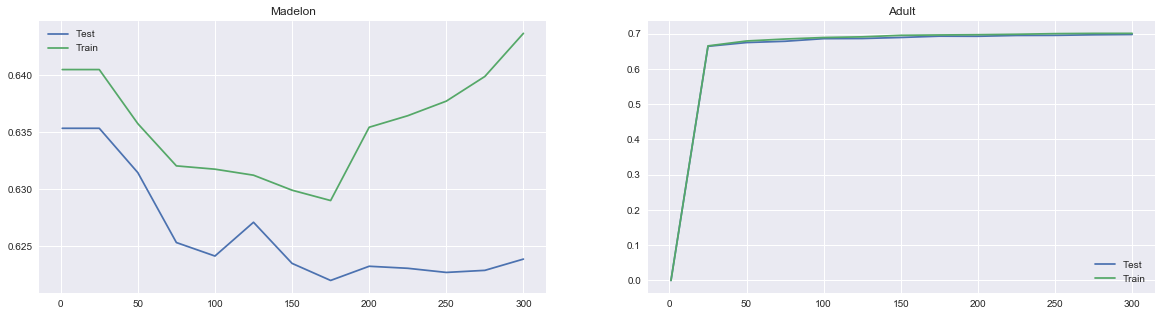

In [17]:
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,2,1)
plt.plot(mad_res[(mad_res['param_learning_rate'] == 0.01)]['param_n_estimators'],
         mad_res[(mad_res['param_learning_rate'] == 0.01)]['mean_test_score'], label = "Test")
plt.plot(mad_res[(mad_res['param_learning_rate'] == 0.01)]['param_n_estimators'],
         mad_res[(mad_res['param_learning_rate'] == 0.01)]['mean_train_score'], label = "Train")

plt.legend()
plt.title("Madelon")
fig.add_subplot(1,2,2)
plt.plot(adl_res[(adl_res['param_learning_rate'] == 1)]['param_n_estimators'],
         adl_res[(adl_res['param_learning_rate'] == 1)]['mean_test_score'], label = "Test")
plt.plot(adl_res[(adl_res['param_learning_rate'] == 1)]['param_n_estimators'],
         adl_res[(adl_res['param_learning_rate'] == 1)]['mean_train_score'], label = "Train")
plt.legend()
plt.title("Adult")

In [18]:
whos DataFrame

Variable             Type         Data/Info
-------------------------------------------
adl_res              DataFrame        mean_fit_time  mean_s<...>003137         0.001946  
adt_data             DataFrame           age  capital-gain <...>[25071 rows x 95 columns]
adult_test_data      DataFrame           age          workc<...>n[7490 rows x 14 columns]
adult_train_data     DataFrame           age          workc<...>[25071 rows x 14 columns]
mad_data             DataFrame          0    1    2    3   <...>[2000 rows x 500 columns]
mad_res              DataFrame        mean_fit_time  mean_s<...>014617         0.000354  
madelon_test_data    DataFrame         0    1    2    3    <...>n[600 rows x 500 columns]
madelon_train_data   DataFrame          0    1    2    3   <...>[2000 rows x 500 columns]


In [19]:
mad_res.to_pickle("results/Ada_GS_madelon.p")
adl_res.to_pickle("results/Ada_GS_adult.p")